# TP1 - AI : Formalisation

---
_Author: CHRISTOFOROU Anthony_\
_Due Date: 11-10-2023_\
_Updated: 09-10-2023_\
_Description: TP1 - AI : Formalisation_

---

In [1]:
# Libraries
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Modules
from src.trees.bfs import BFSTree
from src.node import Node

# make figures appear inline
matplotlib.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### 1. The Three Doctors

#### 1.1 Description

_Alice, Bob, and Charles are three patients being treated by doctors Xavier, Yolande, and Zoé. Today, these six individuals need to be transferred from Guéritou Hospital to Soignetou Hospital using an ambulance that has two seats. The doctors should never be outnumbered by the patients when administering care. However, it is acceptable for patients to be at a hospital without doctors. Additionally, the ambulance should not make any empty trips.
How should the various trips be organized to transport the six people from one hospital to another while adhering to these constraints?_

#### 1.2 Problem Formalization

Let's formalize the problem by extracting the following information to represent the possible scenarios.

1\. **State Representation**

As discussed in class, we will use a 3-coordinate vector $S = \begin{pmatrix}
    d\\
    p\\
    a
\end{pmatrix}$ to represent the states where:

- $d = \{0, 1, 2, 3\}$ the nb of doctors,
- $p = \{0, 1, 2, 3\}$ the nb of patients,
- $a = \{0, 1\}$ if there is an ambulance or not.
- Some constraints we will define later.

Here, each coordinate in the vector can symbolize various elements such as the number of doctors, patients, and the current location of the ambulance, among other possibilities. This enables us to succinctly capture the state of the system at any given time.

For example, a vector \([2, 3, 1]\) could represent that there are 2 doctors, 3 patients, and the ambulance is at Guéritou Hospital. By utilizing such vectors, we can map out a strategy to transfer all six individuals while abiding by the imposed conditions.

We can therefore define the initial state as $S_0 = \begin{pmatrix}
    3\\
    3\\
    1
\end{pmatrix}$ and the final state as $S_f = \begin{pmatrix}
    0\\
    0\\
    0
\end{pmatrix}$.

<div class="alert alert-info">
Note that by knowing the number of doctors and patients, we can infer the number of patients and doctors at the other hospital. For example, if there are 2 doctors and 3 patients at Guéritou Hospital, then there must be 1 doctor and 0 patients at Soignetou Hospital.
</div>

2\. **Possible Transition Operators**

We can define the following transition operators to represent the possible actions that can be taken to move from one state to another.
In this case this will be the possible trips that can be made by the ambulance.
We will use the notation $S \rightarrow S'$ to represent the transition from state $S$ to state $S'$.

<div class="alert alert-warning">
Remember that the ambulance can only transport two people at a time. And that the doctors should never be outnumbered by the patients when administering care.
</div>

We can define the following transition function:

$$\Gamma(S) : S \rightarrow S' \\

\Gamma : \{0, 1, 2, 3\} \times \{0, 1, 2, 3\} \times \{1\} \rightarrow \{0, 1, 2, 3\} \times \{0, 1, 2, 3\} \times \{0\} \\

\begin{pmatrix}
    x & y & 1
\end{pmatrix}

\mapsto

\begin{pmatrix}
    x-d & y-p & 0
\end{pmatrix}$$

<div class="alert alert-info">
Note that for each transition we have a possible inverse transition.
</div>

3\. **Applicable Conditions**

Having a function that can transition from one state to another is not enough to solve the problem. For now we know the space of possible states and the possible transitions between them but we need to define the constraints that must be respected when moving from one state to another.
We can define the following applicable conditions:
- The ambulance can only transport two people at a time: $p + d \leq 2$
- The ambulance should not make any empty trips: $p + d \gt 0$
- The ambulance should always be at one of the two hospitals: $a \in \{0, 1\}$
- The doctors should never be outnumbered by the patients when administering care: $d \geq p$
- It is acceptable for patients to be at a hospital without doctors: $d \geq 0$

We can define all those conditions as a single $ 1 \leq p + d \leq 2$ condition:

$$\Gamma(S) = \{S \rightarrow S' \mid S' = \begin{pmatrix}
    x-d & y-p & 0
\end{pmatrix} \mid 1 \leq p + d \leq 2 \}$$

4\. **Research algorithm using research tree**

The shortest path is 11 transitions long
Path is [(3, 3, 1), (3, 1, 0), (3, 2, 1), (3, 0, 0), (3, 1, 1), (1, 1, 0), (2, 2, 1), (0, 2, 0), (0, 3, 1), (0, 1, 0), (0, 2, 1), (0, 0, 0)]


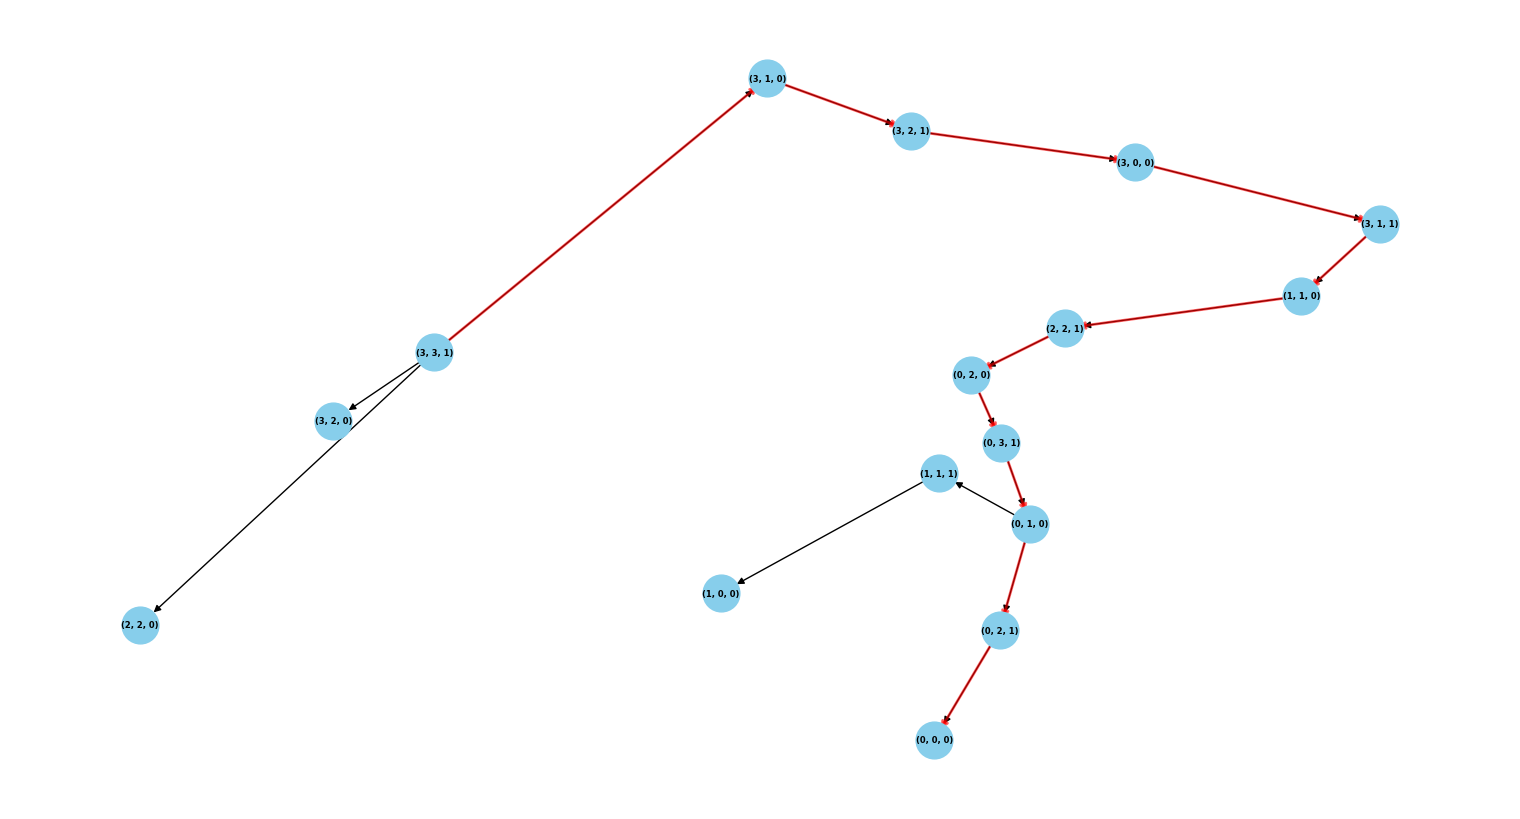

In [35]:
def gamma(d:int, p:int, invert=False) -> list:
    """Transitions from state s to state s' 

    Parameters
    ----------
    d : int
        Number of doctors
    p : int
        Number of patients
    invert : bool, optional
        Invert the transition, by default False
        
    Returns
    -------
    list
        Next state
    """
    if invert:
        return lambda s: (s[0] + d, s[1] + p, 1) 
    return lambda s: (s[0] - d, s[1] - p, 0)

initial_state = (3, 3, 1)
final_state = (0, 0, 0)
root = Node(initial_state, gamma)
tree = BFSTree(root)

path = tree.bfs(final_state)
print(f'The shortest path is {len(path) - 1} transitions long')
print(f'Path is {path}')

tree.visualize(path)

#### 1.3 Complexity

1\. **Search Space Size**

To find the size of the search space we need to find the number of possible states. 
We can do this by finding the number of possible states for each coordinate and then multiplying them together.

- $d = \{0, 1, 2, 3\}$ the nb of doctors, $|d| = 4$
- $p = \{0, 1, 2, 3\}$ the nb of patients, $|p| = 4$
- $a = \{0, 1\}$ if there is an ambulance or not, $|a| = 2$
- $|S| = |d| \times |p| \times |a| = 4 \times 4 \times 2 = 32$

2\. **Non Accompanied States**

We can find the number of states where the each patients are accompanied by doctors by finding the number of states where $d = p$ because the doctors should never be outnumbered by the patients and the ambulance can only transport two people at a time.

- $\{0, 1, 2, 3\} \times \{0, 1\} = 8$ states where $d = p$ 

3\. **Number of states accessible from the initial state**

The number of states accessible from the initial state is the states we can directly derive using the conditions from $S_0 = \begin{pmatrix}
    3\\
    3\\
    1
\end{pmatrix}$.

This means that from $S_0$ we can access 3 different states:

- $S_1 = \begin{pmatrix}
    2\\
    2\\
    0\\
\end{pmatrix}$

- $S_2 = \begin{pmatrix}
    3\\
    2\\
    0\\
\end{pmatrix}$

- $S_3 = \begin{pmatrix}
    3\\
    1\\
    0\\
\end{pmatrix}$

<div class="alert alert-info">
We can also see it on the graph!
</div>

### 1. Hanoi Towers

#### 1.1 Description

_The Tower of Hanoi is a puzzle whose objective is to move a tower from one rod to another. The game consists of n disks of increasing size stacked on three rods. At the start of the game, the n disks form an ascending tower on the left-most rod. The goal is to transfer this tower to the right-most rod, using the middle rod as well. A disk cannot be placed on top of a smaller disk._

